<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/New_Challenge(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# 2) Brief description of data

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.duplicated().any()

False

In [5]:
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Duplicates: 0


In [6]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
corr = df.corr()

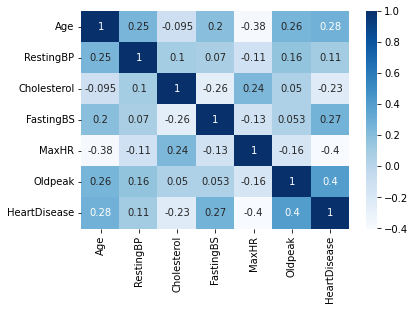

In [8]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [9]:
# 3) What is the target?

X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [11]:
# 4) Is this a classification or regression problem?

This is a clasiification problem.

In [46]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')
mean_imp = SimpleImputer(strategy='mean')
freq_imp = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
num_pipe = make_pipeline(mean_imp, scaler)
cat_pipe = make_pipeline(freq_imp, encoder)
num_tuple = (num_pipe, num_select)
cat_tuple = (cat_pipe, cat_select)
column_transformer = make_column_transformer(num_tuple, cat_tuple)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
pipe = make_pipeline(column_transformer,knn)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [49]:
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

In [50]:
print('Classification Report for Training Set')
train_report = classification_report(y_train, train_pred)
print(train_report)
print('Confusion Matrix for Training Set')
train_con_matrix = confusion_matrix(y_train, train_pred)
print(train_con_matrix)

print('\n\n')

print('Classification Report for Testing Set')
test_report = classification_report(y_test, test_pred)
print(test_report)
print('Confusion Matrix for Testing Set')
con_matrix = confusion_matrix(y_test, test_pred)
print(con_matrix)


Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       313
           1       0.88      0.92      0.90       375

    accuracy                           0.89       688
   macro avg       0.89      0.89      0.89       688
weighted avg       0.89      0.89      0.89       688

Confusion Matrix for Training Set
[[267  46]
 [ 29 346]]



Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        97
           1       0.88      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.87       230
weighted avg       0.87      0.87      0.87       230

Confusion Matrix for Testing Set
[[ 81  16]
 [ 14 119]]


In [51]:
print('Testing accuracy:', pipe.score(X_test, y_test))
print('Training accuracy:',pipe.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8909883720930233


In [55]:
param = {'kneighborsclassifier__n_neighbors': range(10,20),'kneighborsclassifier__weights': ['uniform','distance'],'kneighborsclassifier__p': [2,3,4]}

In [56]:
grid = GridSearchCV(pipe,param_grid=param)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                 

In [57]:
grid = GridSearchCV(pipe,param_grid=param)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                 

In [58]:
test_grid_pred = grid.predict(X_test)
train_grid_pred = grid.predict(X_train)

In [59]:
print('Testing accuracy:', grid.score(X_test, y_test))
print('Training accuracy:',grid.score(X_train,y_train))

Testing accuracy: 0.8956521739130435
Training accuracy: 1.0


In [60]:
log = LogisticRegression()
pipe4 = make_pipeline(column_transformer,log)
pipe4.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [61]:
print('Testing accuracy:', pipe4.score(X_test, y_test))
print('Training accuracy:',pipe4.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8677325581395349


In [62]:
pipe4.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_

In [63]:
grid_param ={'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear'],'logisticregression__C' : [ 10.0, 1.0, 0.1, 0.01], 'logisticregression__tol': [0.0001,.001,.01],'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', 'none']}

In [64]:
grid4 = GridSearchCV(pipe4,grid_param)
grid4.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f55a1209c10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                 

In [65]:
log_test_pred = grid4.predict(X_test)
log_train_pred = grid4.predict(X_train)

In [66]:
print('Classification Report for Training Set')
train_report = classification_report(y_train,log_train_pred)
print(train_report)
print('Classification Report for Test Set')
test_report = classification_report(y_test, log_test_pred)
print(test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       313
           1       0.87      0.89      0.88       375

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        97
           1       0.89      0.88      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [67]:
print('Testing accuracy:', grid4.score(X_test, y_test))
print('Training accuracy:',grid4.score(X_train,y_train))

Testing accuracy: 0.8695652173913043
Training accuracy: 0.8648255813953488


In [68]:
xgb = XGBClassifier()
pipe3 = make_pipeline(column_transformer,xgb)
pipe3.fit(X_train,y_train)
train_pred3 = pipe3.predict(X_train)
test_pred3 = pipe3.predict(X_test)

In [69]:
print('Classification Report for Training Set')
train_report = classification_report(y_train, train_pred3)
print(train_report)
print('Classification Report for Test Set')
test_report = classification_report(y_test, test_pred3)
print(test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       313
           1       0.94      0.96      0.95       375

    accuracy                           0.95       688
   macro avg       0.95      0.94      0.95       688
weighted avg       0.95      0.95      0.95       688

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        97
           1       0.89      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [70]:
param_test = {'xgbclassifier__n_estimators':[2,5,8,9,10,15,20],
               'xgbclassifier__max_depth':range(10,20,30),
                'xgbclassifier__learning_rate':[0.001,.01,1]}
grid3 = GridSearchCV(pipe3,param_grid=param_test);
grid3.fit(X_train,y_train)
best_param = grid3.best_params_
best_param

{'xgbclassifier__learning_rate': 1,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__n_estimators': 10}

In [71]:
train_pred4 = grid3.predict(X_train)
test_pred4 = grid3.predict(X_test)

In [72]:
print('Classification Report for Training Set')
train_report = classification_report(y_train, train_pred4)
print(train_report)
print('Classification Report for Test Set')
test_report = classification_report(y_test, test_pred4)
print(test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       313
           1       0.99      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        97
           1       0.87      0.83      0.85       133

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230



In [73]:
print('Testing accuracy:', grid3.score(X_test, y_test))
print('Training accuracy:',grid3.score(X_train,y_train))

Testing accuracy: 0.8304347826086956
Training accuracy: 0.997093023255814
